## Miami Neighborhood Analysis to setup a Restaurant

### Table of content
* Introduction
* Problem Statement
* Data used for the Analysis
* Methodology
* Result
* Conclusion 

### Introduction

Miami is the cultural, economic and financial center of South Florida in the United States. Miami is the sixth most densely populated major city in the United States .The Miami metropolitan area is home to 6.1 million people, the second-most populous in the southeastern United States and the seventh-largest in the nation. The city has the third tallest skyline in the U.S. 

Miami is a major center and leader in finance, commerce, culture, media, entertainment, the arts, and international trade.The metro area is by far the largest urban economy in Florida and the 12th largest in the United States. Miami was ranked seventh in the United States and 31st among global cities in terms of business activity, human capital, information exchange, cultural experience, and political engagement. According to a UBS study of 77 world cities, the city was ranked as the third-richest in the United States and the eighth-richest in the world in terms of purchasing power.

Greater Downtown Miami has one of the largest concentrations of international banks in the United States, and is home to many large national and international companies. The Health District is a major center for hospitals, clinics, and the biotechnology and medical research industries. PortMiami is the busiest cruise port in the world in both passenger traffic and cruise lines, and refers to itself as the "Cruise Capital of the World".Miami is also a major tourism hub for international visitors, ranking second in the country after New York City.

### Problem Statement

As Miami is one of the richest metropolitan city in United States ,  A Company “ABC” wants to setup a restaurant in Miami. They want to find a best suitable place to setup a restaurant. They need below details about the Miami 

* What are the different Neighborhood

* How the population in each neighborhood

* What are the different venues currently available in each neighborhood 

* Group the similar neighborhood based on the Venues . 

If Company has the above details, it will help them in identifying the suitable place to setup the Restaurant


### Data used for the Analysis

To find the details mentioned in the problem statement, below data source being used. 

Data from Wikipedia .

	Url: 	https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami


In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import folium
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
from numpy.random import rand
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

Using BeautifulSoup and lxml read Wikipedia page

In [2]:
wikihtml = requests.get('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami').text
soup = BeautifulSoup(wikihtml, 'lxml')

In [3]:
neightable = soup.find('table', class_='wikitable sortable')
print(neightable.prettify())

<table class="wikitable sortable">
 <caption>
  Neighborhoods in Miami
  <sup class="reference" id="cite_ref-2">
   <a href="#cite_note-2">
    [2]
   </a>
  </sup>
 </caption>
 <tbody>
  <tr bgcolor="#CCCCCC">
   <th>
    Neighborhood
   </th>
   <th>
    <a href="/wiki/Demonym" title="Demonym">
     Demonym
    </a>
   </th>
   <th>
    Population
    <br/>
    2010
   </th>
   <th>
    Population/
    <br/>
    Km²
   </th>
   <th class="unsortable">
    Sub-neighborhoods
   </th>
   <th>
    Coordinates
   </th>
  </tr>
  <tr>
   <td>
    <a href="/wiki/Allapattah" title="Allapattah">
     Allapattah
    </a>
   </td>
   <td align="right">
   </td>
   <td align="right">
    54,289
   </td>
   <td align="right">
    4,401
   </td>
   <td>
   </td>
   <td>
    25.815,-80.224
   </td>
  </tr>
  <tr>
   <td>
    <a href="/wiki/Arts_%26_Entertainment_District" title="Arts &amp; Entertainment District">
     Arts &amp; Entertainment District
    </a>
   </td>
   <td align="right">
   </t

In [4]:
header = neightable.find_all('th')
tempCols = []
for col in header:
    tempCols.append(col.text.rstrip())
neighColumns = tempCols[0:6]

In [5]:
neighColumns

['Neighborhood',
 'Demonym',
 'Population2010',
 'Population/Km²',
 'Sub-neighborhoods',
 'Coordinates']

In [6]:
def addDataDF(record):
#    print(record.prettify())
    data= []
    rec = record.find_all('td')
    for col in rec:
        if col.a:
            subrec = col.find_all('a')
            for j in subrec:
                data.append(j.text.rstrip())
        else:
            data.append(col.text.rstrip())
    return(data)   

In [7]:
recs = neightable.find_all('tr')
listoflist=[]
for rec in recs:
    tmprec = addDataDF(rec)
    if len(tmprec) == 6:
        listoflist.append(tmprec)

df = pd.DataFrame(listoflist, columns=neighColumns)

df = df.drop('Sub-neighborhoods', axis=1)
df['latitude'], df['longitude'] = df['Coordinates'].str.split(',', 1).str
df = df.drop('Coordinates', axis=1)
df = df.drop('Demonym', axis=1)
df[['latitude','longitude']] = df[['latitude','longitude']].apply(pd.to_numeric)
df = df.dropna()
dfneigh = df

In [8]:
df['Population2010'] = df['Population2010'].str.replace(',', '')

In [9]:
df['Population2010'] = df['Population2010'].apply(pd.to_numeric) 

From the Wikipedia page Neighborhood, population, Population/km2, Latitude and Longitude data is extracted.
Below is the data 

In [10]:
df

,Neighborhood,Population2010,Population/Km²,latitude,longitude
0,Allapattah,54289,"4,401",25.815,-80.224
1,Arts & Entertainment District,11033,"7,948",25.799,-80.190
2,Brickell,31759,"14,541",25.758,-80.193
3,Buena Vista,9058,"3,540",25.813,-80.192
4,Coconut Grove,20076,"3,091",25.712,-80.257
5,Coral Way,35062,"4,496",25.750,-80.283
6,Design District,3573,"3,623",25.813,-80.193
7,Edgewater,15005,"6,675",25.802,-80.190
8,Flagami,50834,"5,665",25.762,-80.316
9,Grapeland Heights,14004,"4,130",25.792,-80.258


Plot graph with the above data to identify population distribution for every Neighborhood. We can see that "Little Havana", "Allapattah" and "Flagami"  are more populated Neighborhood. 

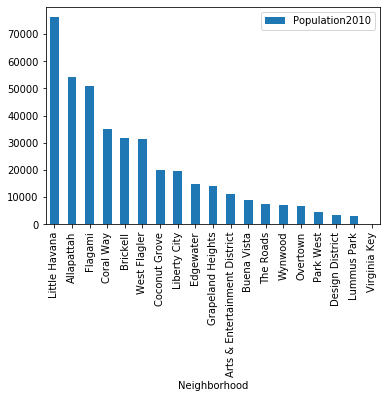

In [50]:
df_popcnt = df
df_popcnt = df_popcnt.sort_values('Population2010', ascending=False).reset_index(drop=True)

df_popcnt.plot(x='Neighborhood', y=['Population2010'], kind="bar")
plt.show()

In [12]:
from geopy.geocoders import Nominatim

address = 'Miami, FL'
geolocator = Nominatim(user_agent="fl_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Miami City are {}, {}.'.format(latitude, longitude
))

The geograpical coordinate of Miami City are 25.7742658, -80.1936589.


Creating folium map for the Miami Neighborhood. We can see below all the neighborhood highlighted in blue circle 

In [13]:
map_miami = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['latitude'], df['longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_miami)  
    
map_miami

Using FourSquare API, get the more details about the Miami Neighborhood 

In [14]:
CLIENT_ID = '0MZB4NEXMR0GDNSOJK0SCTOPJEMLVN4SKXNQ0FE04LRQYOMH' # your Foursquare ID
CLIENT_SECRET = 'LPYCVOCBUZ3HWOVVIHINHV4HTITOK5WQGA2CDO2FOEJWM3NE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0MZB4NEXMR0GDNSOJK0SCTOPJEMLVN4SKXNQ0FE04LRQYOMH
CLIENT_SECRET:LPYCVOCBUZ3HWOVVIHINHV4HTITOK5WQGA2CDO2FOEJWM3NE


In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
miami_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

miami_venues_tmp = miami_venues
miami_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allapattah,25.815,-80.224,Three Fingers Liquor & Lounge,25.815408,-80.224361,Lounge
1,Allapattah,25.815,-80.224,Ross,25.815820,-80.221753,Department Store
2,Allapattah,25.815,-80.224,noor market,25.818165,-80.224197,Convenience Store
3,Arts & Entertainment District,25.799,-80.190,Bunnie Cakes,25.799544,-80.190953,Cupcake Shop
4,Arts & Entertainment District,25.799,-80.190,Bunbury Miami,25.798284,-80.191118,Wine Shop


In [17]:
miami_venues.shape

(408, 7)

In [21]:
print('There are {} uniques categories.'.format(len(miami_venues['Venue Category'].unique())))

There are 136 uniques categories.


Identify Venue count for each neighborhood. Plot graph showing population and number of venues per each neighborhood. 

In [48]:
# venue_cnt = miami_venues.groupby('Neighborhood').count()
venue_cnt = miami_venues 
venue_cnt = venue_cnt.groupby("Neighborhood")["Neighborhood Latitude"].count().to_frame().reset_index()
venue_cnt['NumberOfVenues'] = venue_cnt['Neighborhood Latitude']
venue_cnt = venue_cnt.drop('Neighborhood Latitude', axis=1)
venue_cnt['Population2010'] = df['Population2010']
venue_cnt = venue_cnt.sort_values('NumberOfVenues', ascending=False).reset_index(drop=True)

In [19]:
df_tmp = venue_cnt
df_tmp = venue_cnt.drop('Neighborhood', axis=1)
cols = df_tmp.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_tmp)
df_normalized = pd.DataFrame(np_scaled, columns = cols)
df_normalized['Neighborhood'] = venue_cnt['Neighborhood']

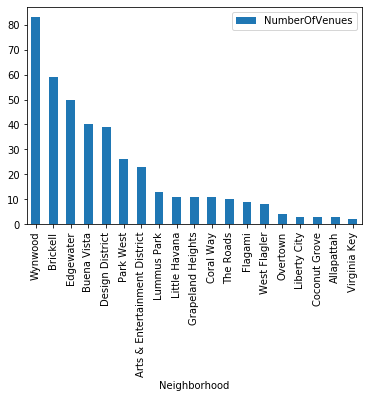

In [49]:
venue_cnt.plot(x='Neighborhood', y=['NumberOfVenues'], kind="bar")
plt.show()

### Methodology

K-Means clustering is used to group the Neighborhoods based on the similarities in the Venues. Also, we have identified the population of each neighborhood and the number of Venues in each neighborhood. this will help to understand happening places in the Miami Neighborhood. This gives very good insight in making the decision on finalizing the best place to setup the Restaurant. 

In the below sections, We can also see top 5 venue categories for each Neighborhood. 

In [30]:
miami_onehot = pd.get_dummies(miami_venues[['Venue Category']], prefix="", prefix_sep="")
miami_onehot = miami_onehot.drop('Neighborhood', axis=1)

In [31]:
miami_onehot['Neighborhood'] = miami_venues['Neighborhood'] 

In [32]:
fixed_columns = [miami_onehot.columns[-1]] + list(miami_onehot.columns[:-1])
miami_onehot = miami_onehot[fixed_columns]

miami_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,...,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Allapattah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Allapattah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Allapattah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arts & Entertainment District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arts & Entertainment District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
miami_grouped = miami_onehot.groupby('Neighborhood').mean().reset_index()
miami_grouped.head()

,Neighborhood,Accessories Store,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,...,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Allapattah,0.0,0.000000,0.0,0.000,0.000,0.000000,0.000000,0.00,0.000,...,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.000,0.0
1,Arts & Entertainment District,0.0,0.000000,0.0,0.000,0.000,0.000000,0.043478,0.00,0.000,...,0.0,0.0,0.0,0.000000,0.000,0.043478,0.0,0.0,0.000,0.0
2,Brickell,0.0,0.033898,0.0,0.000,0.000,0.033898,0.000000,0.00,0.000,...,0.0,0.0,0.0,0.016949,0.000,0.000000,0.0,0.0,0.000,0.0
3,Buena Vista,0.0,0.025000,0.0,0.025,0.025,0.000000,0.025000,0.05,0.025,...,0.0,0.0,0.0,0.000000,0.025,0.000000,0.0,0.0,0.025,0.0
4,Coconut Grove,0.0,0.333333,0.0,0.000,0.000,0.000000,0.000000,0.00,0.000,...,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.000,0.0


In [35]:
num_top_venues = 5

for hood in miami_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = miami_grouped[miami_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allapattah----
                           venue  freq
0              Convenience Store  0.33
1               Department Store  0.33
2                         Lounge  0.33
3              Accessories Store  0.00
4  Paper / Office Supplies Store  0.00


----Arts & Entertainment District----
            venue  freq
0  Ice Cream Shop  0.09
1      Restaurant  0.09
2             Gym  0.09
3    Cupcake Shop  0.04
4  Sandwich Place  0.04


----Brickell----
                 venue  freq
0                Hotel  0.08
1   Italian Restaurant  0.07
2  Japanese Restaurant  0.05
3   Salon / Barbershop  0.03
4   Seafood Restaurant  0.03


----Buena Vista----
                venue  freq
0                Café  0.08
1           Nightclub  0.05
2      Clothing Store  0.05
3  Italian Restaurant  0.05
4         Coffee Shop  0.05


----Coconut Grove----
                 venue  freq
0  American Restaurant  0.33
1                 Park  0.33
2        Boat or Ferry  0.33
3       Ice Cream Shop  0.00
4          

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [43]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = miami_grouped['Neighborhood']

for ind in np.arange(miami_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(miami_grouped.iloc[ind, :], num_top_venues)

In [44]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,Lounge,Convenience Store,Department Store,Dog Run,Fast Food Restaurant,Farmers Market,Event Space,Empanada Restaurant,Electronics Store,Yoga Studio
1,Arts & Entertainment District,Ice Cream Shop,Gym,Restaurant,Coffee Shop,Paper / Office Supplies Store,Park,Moving Target,Cupcake Shop,Pizza Place,Salon / Barbershop
2,Brickell,Hotel,Italian Restaurant,Japanese Restaurant,Restaurant,Bank,Café,Harbor / Marina,Salon / Barbershop,Sandwich Place,Seafood Restaurant
3,Buena Vista,Café,Art Museum,Clothing Store,Nightclub,Boutique,Italian Restaurant,Jewelry Store,Coffee Shop,Shopping Mall,Chinese Restaurant
4,Coconut Grove,American Restaurant,Park,Boat or Ferry,Yoga Studio,Dog Run,Fast Food Restaurant,Farmers Market,Event Space,Empanada Restaurant,Electronics Store
5,Coral Way,Liquor Store,Pharmacy,Mobile Phone Shop,Seafood Restaurant,Historic Site,Golf Course,Burger Joint,Electronics Store,Café,Dive Bar
6,Design District,Café,Art Museum,Clothing Store,Nightclub,Boutique,Italian Restaurant,Jewelry Store,Coffee Shop,Shopping Mall,Chinese Restaurant
7,Edgewater,Restaurant,Sandwich Place,Art Gallery,Pizza Place,Peruvian Restaurant,Cuban Restaurant,Spa,Breakfast Spot,Coffee Shop,Gym / Fitness Center
8,Flagami,Seafood Restaurant,Department Store,Fast Food Restaurant,Peruvian Restaurant,Latin American Restaurant,Spanish Restaurant,Bakery,Pet Store,Dessert Shop,Diner
9,Grapeland Heights,Gym / Fitness Center,Golf Course,Restaurant,Bar,Bakery,Bus Station,Auto Garage,Hotel Bar,Hotel,Gym


In [38]:
kclusters = 3

miami_grouped_clustering = miami_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(miami_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:18] 

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0])

In [39]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

miami_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
miami_merged = miami_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

miami_merged.head() # check the last columns!

,Neighborhood,Population2010,Population/Km²,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,54289,"4,401",25.815,-80.224,1,Lounge,Convenience Store,Department Store,Dog Run,Fast Food Restaurant,Farmers Market,Event Space,Empanada Restaurant,Electronics Store,Yoga Studio
1,Arts & Entertainment District,11033,"7,948",25.799,-80.190,0,Ice Cream Shop,Gym,Restaurant,Coffee Shop,Paper / Office Supplies Store,Park,Moving Target,Cupcake Shop,Pizza Place,Salon / Barbershop
2,Brickell,31759,"14,541",25.758,-80.193,0,Hotel,Italian Restaurant,Japanese Restaurant,Restaurant,Bank,Café,Harbor / Marina,Salon / Barbershop,Sandwich Place,Seafood Restaurant
3,Buena Vista,9058,"3,540",25.813,-80.192,0,Café,Art Museum,Clothing Store,Nightclub,Boutique,Italian Restaurant,Jewelry Store,Coffee Shop,Shopping Mall,Chinese Restaurant
4,Coconut Grove,20076,"3,091",25.712,-80.257,0,American Restaurant,Park,Boat or Ferry,Yoga Studio,Dog Run,Fast Food Restaurant,Farmers Market,Event Space,Empanada Restaurant,Electronics Store


In [62]:
cluster_1 = miami_merged.loc[miami_merged['Cluster Labels']==0]

In [63]:
cluster_2 = miami_merged.loc[miami_merged['Cluster Labels']==1]

In [64]:
cluster_3 = miami_merged.loc[miami_merged['Cluster Labels']==2]

In [42]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(miami_merged['latitude'], miami_merged['longitude'], miami_merged['Neighborhood'], miami_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 1

In [59]:
cluster_1.loc[:,['Neighborhood','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue']] 

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Arts & Entertainment District,Ice Cream Shop,Gym,Restaurant,Coffee Shop,Paper / Office Supplies Store
2,Brickell,Hotel,Italian Restaurant,Japanese Restaurant,Restaurant,Bank
3,Buena Vista,Café,Art Museum,Clothing Store,Nightclub,Boutique
4,Coconut Grove,American Restaurant,Park,Boat or Ferry,Yoga Studio,Dog Run
5,Coral Way,Liquor Store,Pharmacy,Mobile Phone Shop,Seafood Restaurant,Historic Site
6,Design District,Café,Art Museum,Clothing Store,Nightclub,Boutique
7,Edgewater,Restaurant,Sandwich Place,Art Gallery,Pizza Place,Peruvian Restaurant
8,Flagami,Seafood Restaurant,Department Store,Fast Food Restaurant,Peruvian Restaurant,Latin American Restaurant
9,Grapeland Heights,Gym / Fitness Center,Golf Course,Restaurant,Bar,Bakery
11,Liberty City,Caribbean Restaurant,Southern / Soul Food Restaurant,Park,Discount Store,Event Space


#### Cluster 2

In [60]:
cluster_2.loc[:,['Neighborhood','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue']] 

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allapattah,Lounge,Convenience Store,Department Store,Dog Run,Fast Food Restaurant


#### Cluster 3

In [61]:
cluster_3.loc[:,['Neighborhood','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue']] 

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
17,Virginia Key,Beach,Dive Bar,Fast Food Restaurant,Farmers Market,Event Space


### Result

From the above analysis, we can see below details. 

* "Little Havana", "Allapattah" ,"Flagami", "Coral Way" and "Brickell,  are the top 5  populated Neighborhood
* "Wynwood" , "Brickell",  "Edgewater", "Buena Vista" and "Design District" are the top 5 neighborhood having more number of Venues. 
* Based on the different Venue categories, 3 groups of Neighborhoods are identified. 

Group 1 - 

Arts & Entertainment District 
Brickell
Buena Vista
Coconut Grove
Coral Way
Design District
Edgewater
Flagami
Grapeland Heights
Liberty City
Little Havana
Lummus Park
Overtown
Park West
The Roads
West Flagler
Wynwood

Group2 - Allapattah	
Group3 - Virginia Key	



### Conclusion 

From the Analysis result , we noticed that Allapattah is having more population. It dont have restaurants as the most common Venue category .  So, Allapattah is the right place to setup new restaurant. 